# Introduction to Keras
Keras is a high-level neural network library that runs on top of lower-level deep learning frameworks such as TensorFlow, Theano, and CNTK. Keras provides a user-friendly interface for building and training deep neural networks. It is designed to be easy to use and highly modular, allowing developers to quickly prototype and experiment with different network architectures and configurations.

Keras was developed with the goal of making deep learning accessible to a wider audience, including researchers, engineers, and students. It abstracts away many of the details of building and training neural networks, allowing users to focus on the high-level structure and behavior of the network.

One of the key features of Keras is its modular design. Keras allows users to build complex neural networks by combining pre-built building blocks known as layers. Layers are the basic building blocks of neural networks, and they can be stacked together to form more complex networks. Keras provides a large library of pre-built layers, including convolutional layers, recurrent layers, and dense layers.

Keras also provides a variety of tools for training and evaluating neural networks. These include built-in support for common optimization algorithms, such as stochastic gradient descent, as well as tools for monitoring training progress and visualizing model performance.

Keras has become a popular choice for deep learning projects due to its ease of use, modularity, and flexibility. It is widely used in both industry and academia for a variety of applications, including computer vision, natural language processing, and speech recognition.

# Example Projects on Classification and Regression

### Classification Projects:

1. **Image Classification:** This involves building a model that can classify images into different categories. For example, classifying images of animals into categories such as cats, dogs, and birds.
2. **Sentiment Analysis:** This involves building a model that can classify text into different sentiment categories such as positive, negative, or neutral. For example, analyzing customer reviews to determine their sentiment towards a product or service.
3. **Fraud Detection:** This involves building a model that can classify transactions into fraudulent or non-fraudulent categories. For example, detecting fraudulent credit card transactions based on patterns in the data.

### Regression Projects:

1. **House Price Prediction:** This involves building a model that can predict the price of a house based on features such as its location, size, and number of rooms.
2. **Stock Price Prediction:** This involves building a model that can predict the future price of a stock based on historical price data and other factors such as news articles and economic indicators.
3. **Energy Consumption Prediction:** This involves building a model that can predict the amount of energy consumed by a building based on factors such as weather, occupancy, and time of day.

All of these projects require gathering and preprocessing data, choosing appropriate machine learning algorithms, tuning hyperparameters, and evaluating the model's performance. These projects can be implemented using various machine learning libraries such as Scikit-learn, TensorFlow, and Keras.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 11s 1us/step


In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
train_images[0].ndim

2

In [5]:
train_images[0].shape

(28, 28)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels[0]

5

In [9]:
#Network Architecture
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
#Compilation Step
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Preparing the image data
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [12]:
#Preaparing the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
#Training Step
network.fit(train_images, train_labels, epochs= 5, batch_size= 128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2546 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1029 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0494 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0373 - accuracy: 0.9893


In [14]:
#Testing Step
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9797
test_acc: 0.9797000288963318


In [15]:
network.predict(test_images)[0]

array([5.4113091e-08, 1.2320121e-10, 2.5431631e-05, 4.0579159e-04,
       4.6213658e-12, 2.3404462e-07, 8.5492780e-15, 9.9953043e-01,
       1.6399244e-06, 3.6312551e-05], dtype=float32)

In [17]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

<function matplotlib.pyplot.show(close=None, block=None)>

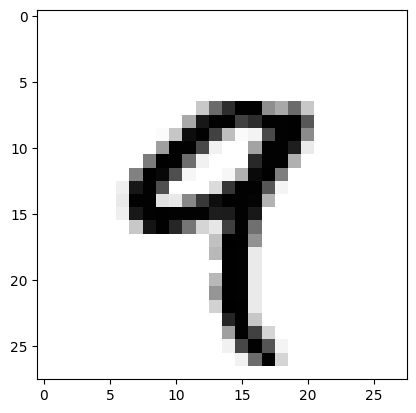

In [18]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show

In [19]:
train_labels[4]

9